In [6]:
import sklearn
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import os

Load and Split the Data

In [7]:
# TODO: Move these two functions to a shared file for helper functions
def unPickleData(filename):
  with open(filename,'rb') as f: arr = pickle.load(f)
  return arr

def getDataPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"processed_data", dirname,filename)

x_data = unPickleData(getDataPath("posts","X_posts.pkl"))
y_data = unPickleData(getDataPath("posts","Y_posts.pkl"))

from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(x_data,y_data, train_size=0.6 , random_state= 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5 , random_state= 42)

KNN Training & Hyperparameter Tuning

In [4]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier()

parameters = dict(n_neighbors=[3 , 5 , 10])
linearClassifier = GridSearchCV(KNNclassifier, parameters, scoring = ['f1_micro','accuracy'], cv=5, refit='f1_micro')
linearClassifier.fit(X_train, y_train)

bestKNNClassifier = linearClassifier.best_estimator_

In [5]:
print("For KNN:")
print(f"Best Estimator: {linearClassifier.best_estimator_}")
print(f"F-measure = {linearClassifier.best_score_}")
print(f"Accuracy = {max(linearClassifier.cv_results_['mean_test_f1_micro'])}")

For KNN:
Best Estimator: KNeighborsClassifier(n_neighbors=10)
F-measure = 0.8756120401337792
Accuracy = 0.8756120401337792


Testing

In [6]:
y_pred = bestKNNClassifier.predict(X_test)

print(sklearn.metrics.classification_report(y_test,y_pred))
print(f"Accuracy = {sklearn.metrics.accuracy_score(y_test, y_pred)}")
print(f"f-measure = {sklearn.metrics.f1_score(y_test, y_pred, average='micro')}")

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10624
           1       0.87      0.20      0.32      1835

    accuracy                           0.88     12459
   macro avg       0.87      0.60      0.63     12459
weighted avg       0.88      0.88      0.84     12459

Accuracy = 0.877437996628943
f-measure = 0.877437996628943


Saving the model

In [7]:
def getSavedModelPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"savedModels", dirname,filename)

with open(getSavedModelPath("posts","KNN.pkl"), 'wb') as f:
    pickle.dump(bestKNNClassifier,f)

Confusion Matrix

In [4]:
import pickle
def getSavedModelPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"savedModels", dirname,filename)

bestKNNClassifier = pickle.load(open(getSavedModelPath("posts","KNN.pkl"), "rb"))
print(bestKNNClassifier)

KNeighborsClassifier(n_neighbors=10)


Confusion matrix, without normalization
[[10568    56]
 [ 1471   364]]
Normalized confusion matrix
[[0.99472892 0.00527108]
 [0.80163488 0.19836512]]


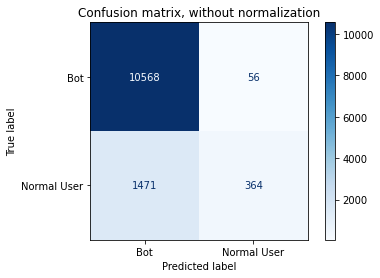

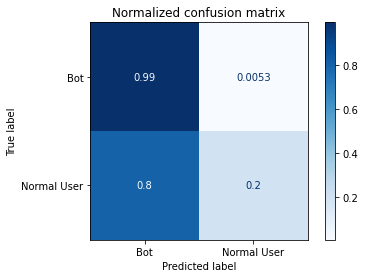

In [8]:
import matplotlib.pyplot as plot
from sklearn.metrics import ConfusionMatrixDisplay

title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in title_options:
    display = ConfusionMatrixDisplay.from_estimator(
        bestKNNClassifier,
        X_test,
        y_test,
        display_labels=["Bot" , "Normal User"],
        cmap=plot.cm.Blues,
        normalize=normalize,
    )
    display.ax_.set_title(title)

    print(title)
    print(display.confusion_matrix)

plot.show()


Learning Curve